### <b> Dominik Szot <br> 02.03.2023 Laboratorium 1  <br> Analiza Błędów </b>

### <b> Zadanie 1 </b> 
Oblicz przybliżoną wartość pochodnej funkcji używając wzoru 

$$ 
    f'(x) \approx \frac {f(x + h) - f(x)} {h}
$$ 

Sprawdź działanie programu dla funkcji $ tan(x) $ oraz $ x = 1$. <br>
Wyznacz błąd porównując otrzymaną wartość z kwadratem funkcji wbudowanej $ sec(x) $. <br>
Pomocna będzie biblioteka mathfm lub tożsamość $ sec^2(x) = 1 + tg^2(x)$. <br>

Narysuj wykres przedstawiający wartość bezwględną błędu w zależności od $ h $ dla $ h = 10−k, k = 0,...,16 $.<br>
Użyj skali logarytmicznej na obu osiach. Czy wykres wartości bezwględnej błędu posiada minimum? <br>

Porównaj wyznaczoną wartość hmin z wartością otrzymaną ze wzoru
$$ h_{min} ≈ \sqrt {e_{maech}} $$
Powtórz ćwiczenie używając wzoru różnic centralnych

$$ 
f'(x) \approx \frac {f(x + h) - f(x - h)} {2h}
$$

In [130]:
import numpy as np 
import matplotlib.pyplot as plt 

In [131]:
# values of step of function 
function_step = np.longdouble([10**(-k) for k in range(0,16)])

# tested function 
x = 1
function = lambda x : np.tan(x, dtype=np.longdouble)

# differecne function of a f 
forward_difference = lambda x = 1, h = 10*(-8): np.divide((function(x+h) - function(x)),h, dtype=np.longdouble)
central_difference = lambda x = 1, h = 10*(-8): np.divide((function(x+h) - function(x-h)), 2*h, dtype=np.longdouble)


In [132]:
# actual values of function
actual_value =  1+(np.tan(x, dtype=np.longdouble)*np.tan(x, dtype=np.longdouble))

approximated_values = {}

# approximated values of derivative 
approximated_values['forward_difference'] = [forward_difference(x, h_value) for h_value in function_step]

approximated_values['central_difference'] = [central_difference(x, h_value) for h_value in function_step]

In [133]:
results = {}
results['forward_difference'] = [np.abs(actual_value - approximated_values['forward_difference'][i]) for i in range(len(function_step))]
results['central_difference'] = [np.abs(actual_value - approximated_values['central_difference'][i]) for i in range(len(function_step))]

Text(0.5, 1.0, 'Wartość bezwględna błędu w zależonści od h')

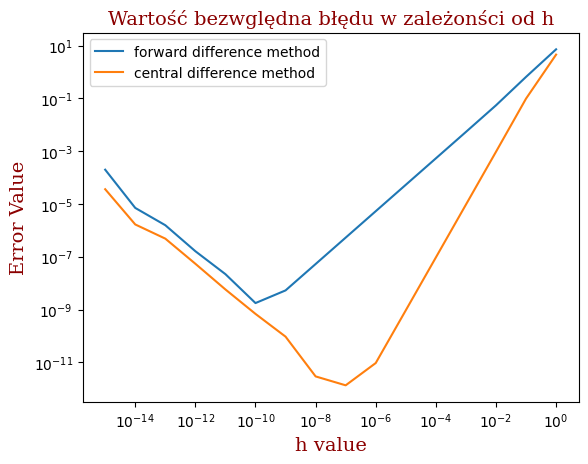

In [140]:
fig, plot = plt.subplots()

plot.loglog(function_step, results['forward_difference'], label="forward difference method")
plot.loglog(function_step, results['central_difference'], label="central difference method")

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}

plot.set_xlabel("h value", fontdict=font)
plot.set_ylabel("Error Value", fontdict=font)
plot.legend()

plot.set_title("Wartość bezwględna błędu w zależonści od h", fontdict=font)

Epsilon maszynowy - najmniejsza liczba zmiennoprzecinkowa, dla której zachodzi 
$$ 
    1 \bigoplus \epsilon > 1
$$

$ \bigoplus $ - dodawanie zmiennoprzecinkowe. <br>
Maszynowy epsilon określa precycję obliczeń wykonywanych na liczbach zmiennoprzecinkowych

In [135]:
def machine_epsilon_function(func=float):
    machine_epsilon = func(1)

    while func(1)+func(machine_epsilon) != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)

    return machine_epsilon_last

In [136]:
minimal_value_central = function_step[list(results['forward_difference']).index(min(results['forward_difference']))]
minimal_value_forward = function_step[list(results['central_difference']).index(min(results['central_difference']))]

print(f"[CENTRAL] Minimal value : {minimal_value_central}, Machine epsilon: { np.sqrt(np.abs(machine_epsilon_function(function)))}")
print(f"[FORWARD] Minimal value : {minimal_value_forward}, Machine epsilon: { np.sqrt(np.abs(machine_epsilon_function(function)))}")

[CENTRAL] Minimal value : 1e-10, Machine epsilon: 2.928739915522781e-10
[FORWARD] Minimal value : 1e-07, Machine epsilon: 2.928739915522781e-10


| Difference method | Minimal value | $ \sqrt {\epsilon_{mach}}$ | 
| :-: | :-: | :-:|
| Forward Difference Method | 1e-10 | 2.928739915522781e-10 | 
| Central Difference Method | 1e-10 | 2.928739915522781e-10 | 


Otrzymane wartości nie odbiegają od siebie w sposób znaczący. 

### <b> Zadanie 2</b> 
Napisz program generujący pierwsze $ n $ wyrazów ciągu zdefiniowanego równaniem różnicowym: 

$$ 
    x_{k+1} = 2.25x_{k} - 0.5x_{k-1} 
$$

z wyrazami początkowymi 

$$
    x_1 = \frac {1} {3} \ \ \  x_{2} = \frac {1} {12}
$$

Przyjmij $ n = 60 $ jeśli używasz pojedynczej precyzji oraz $ n = 225 $ jeśli używasz podwójnej precyzji. <br>
Narysuj wykres wartości ciągu w zależności od k. Użyj skali logarytmicznej na osi y (pomocna będzie funkcja `semilogy`). <br>
Następnie narysuj wykres przedstawiający wartość bezwględną błędu względnego w zależności od k. <br>

Dokładne rozwiązanie równania różnicowego:

$$
x_{k} = \frac {4^{1-k}} {3}
$$


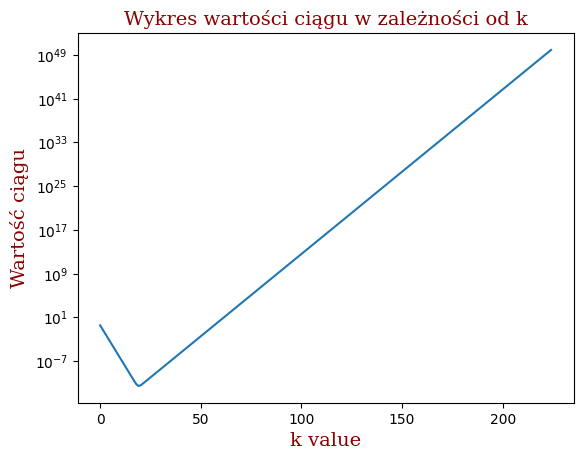

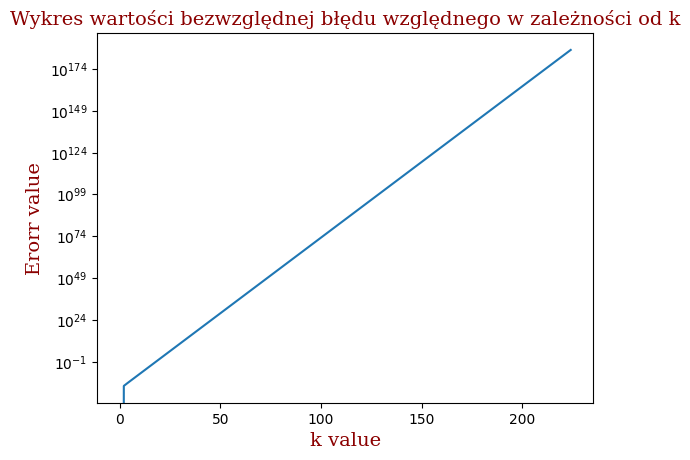

In [148]:
result = [1./3, 1./12]
for i in range(2, 225):
    result.append(result[i-1]*2.25 - 0.5*result[i-2])
    
x = [i for i in range(225)]

fig, plot = plt.subplots()
plot.semilogy(x, result)
plot.set_title("Wykres wartości ciągu w zależności od k", fontdict=font)
plot.set_xlabel("k value", fontdict=font)
plot.set_ylabel("Wartość ciągu", fontdict=font)
plt.show()

actualValue = [4**(1-i)*(1./3) for i in range(1,226)]
errorValue = [np.abs((actualValue[i] - result[i])/actualValue[i]) for i in range(225)]

fig, plot = plt.subplots()
plot.semilogy(x, errorValue)
plot.set_title("Wykres wartości bezwzględnej błędu względnego w zależności od k", fontdict=font)
plot.set_xlabel("k value", fontdict=font)
plot.set_ylabel("Erorr value", fontdict=font)
plt.show()

Dla $ k $ należącego do przedziału od $ 0 $ do $ k = 19 $ nasz ciąg jest malejący. <br> 
Dla $ k > 19 $ wykres jest już rosnący. Spowodowane jest to  najprawdopodobniej błędem obcięcia, <br>
który pojawia się gdy próbujemy przybliżyć nieskończony ciąg skończona ilością elementów.